In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import matplotlib.pyplot as plt

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
train_dir = "/root/workspace/DeepLearning/ConvNet/datasets/cats_and_dogs_small/train"
validation_dir = "/root/workspace/DeepLearning/ConvNet/datasets/cats_and_dogs_small/validation"

In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

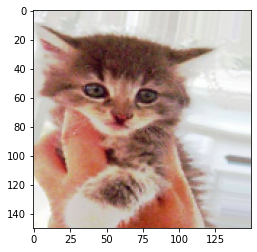

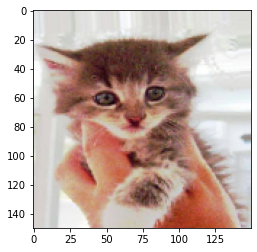

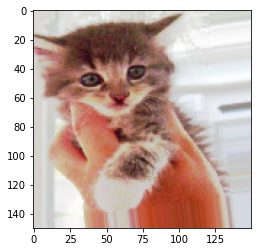

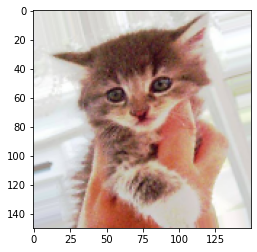

In [4]:
train_cat_dir = train_dir + "/cats"
fnames = sorted([os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print("batch data size:", data_batch.shape)
    print("batch label size:", labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
batch data size: (20, 150, 150, 3)
batch label size: (20,)


In [6]:
# generate a model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 14s 132ms/step - loss: 0.4848 - acc: 0.7730 - val_loss: 0.4980 - val_acc: 0.7580
Epoch 2/100
100/100 [==============================] - 13s 134ms/step - loss: 0.5034 - acc: 0.7682 - val_loss: 0.4742 - val_acc: 0.7730
Epoch 3/100
100/100 [==============================] - 13s 130ms/step - loss: 0.4795 - acc: 0.7799 - val_loss: 0.5386 - val_acc: 0.7160
Epoch 4/100
100/100 [==============================] - 13s 130ms/step - loss: 0.4872 - acc: 0.7606 - val_loss: 0.5047 - val_acc: 0.7590
Epoch 5/100
100/100 [==============================] - 13s 126ms/step - loss: 0.4815 - acc: 0.7668 - val_loss: 0.4605 - val_acc: 0.7870
Epoch 6/100
100/100 [==============================] - 13s 132ms/step - loss: 0.4960 - acc: 0.7520 - val_loss: 0.4959 - val_acc: 0.7540
Epoch 7/100
100/100 [==============================] - 13s 131ms/step - loss: 0.4983 - acc: 0.7437 - val_loss: 0.4521 - val_acc: 0.7960
Epoch 8/100
100/100 [===========================

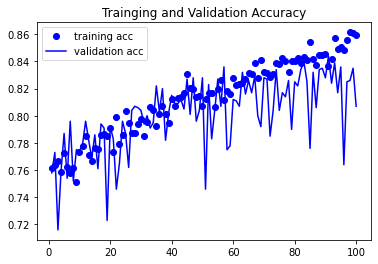

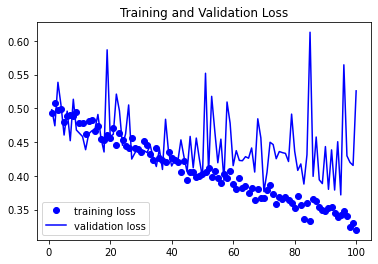

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Trainging and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()